In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cinci_1320 = pd.read_csv('./data/cinci1320.csv', index_col='Date_of_Payment', parse_dates=True).sort_index()

C:\Users\sarah\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (17,18,19,47,48,49,50,51,52,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
cinci_1320.head()

,Change_Type,Covered_Recipient_Type,Physician_Profile_ID,Physician_First_Name,Physician_Middle_Name,Physician_Last_Name,Physician_Name_Suffix,Recipient_Primary_Business_Street_Address_Line1,Recipient_Primary_Business_Street_Address_Line2,Recipient_City,...,xarelto,victoza,humira,levemir,invokana,farxiga,entresto,chantix,myrbetriq,toujeo
Date_of_Payment,,,,,,,,,,,,,,,,,,,,,
2013-08-01,UNCHANGED,Covered Recipient Physician,148974,RODNEY,NaN,VIVIAN,NaN,8000 5 MILE RD,240,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0
2013-08-01,UNCHANGED,Covered Recipient Physician,58931,PAUL,JOSEPH,FAVORITO,NaN,7575 5 MILE RD,NaN,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0
2013-08-01,UNCHANGED,Covered Recipient Physician,812462,ALFRED,JAMES,SUGAWARA,NaN,8477 FOXCROFT DR,NaN,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0
2013-08-01,UNCHANGED,Covered Recipient Physician,108863,MARK,A,MANEGOLD,NaN,2450 KIPLING AVE,SUITE 104,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0
2013-08-01,UNCHANGED,Covered Recipient Physician,195441,MANOJKUMAR,S,SINGH,NaN,10600 MONTGOMERY RD,SUITE 200,CINCINNATI,...,0,0,0,0,0,0,0,0,0,0


In [4]:
cinci_1320['Change_Type'].value_counts()

UNCHANGED    364686
CHANGED         726
ADD               1
Name: Change_Type, dtype: int64

In [5]:
cinci_1320['xarelto'].value_counts()

0    353682
1     11731
Name: xarelto, dtype: int64

In [6]:
xarelto = cinci_1320[(cinci_1320['xarelto']==1) & (cinci_1320['Number_of_Payments_Included_in_Total_Amount']==1)].copy()

In [7]:
xarelto['xarelto'].value_counts()

1    11731
Name: xarelto, dtype: int64

In [8]:
xarelto['Change_Type'].value_counts()

UNCHANGED    11731
Name: Change_Type, dtype: int64

In [9]:
xarelto['xare_dollars'] = [k if ((i ==1) & (j ==1)) else 0 for i, j, k in zip(xarelto['xarelto'], xarelto['Number_of_Payments_Included_in_Total_Amount'], xarelto['Total_Amount_of_Payment_USDollars'])]

#Ben Peck helped me with this during office hours.  I was oh-so-close but not quite there!

In [10]:
xarelto['xare_dollars'].sum()

1747345.12

In [11]:
drop_cols = ['Change_Type','Covered_Recipient_Type',
'Physician_First_Name',
'Physician_Middle_Name',
'Physician_Last_Name',
'Physician_Name_Suffix',
'Recipient_Primary_Business_Street_Address_Line1',
'Recipient_Primary_Business_Street_Address_Line2',
'Recipient_City',
'Recipient_State',
'Recipient_Zip_Code',
'Recipient_Country',
'Physician_Primary_Type',
'Physician_Specialty',
'Physician_License_State_code1',
'Physician_License_State_code2',
'Physician_License_State_code3',
'Physician_License_State_code4',
'Physician_License_State_code5',
'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name',
'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State',
'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country',
'Form_of_Payment_or_Transfer_of_Value',
'City_of_Travel',
'State_of_Travel',
'Country_of_Travel',
'Physician_Ownership_Indicator',
'Third_Party_Payment_Recipient_Indicator',
'Name_of_Third_Party_Entity_Receiving_Payment_or_Transfer_of_Value',
'Charity_Indicator',
'Third_Party_Equals_Covered_Recipient_Indicator',
'Contextual_Information',
'Delay_in_Publication_Indicator',
'Dispute_Status_for_Publication',
'Related_Product_Indicator',
'Covered_or_Noncovered_Indicator_1',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1',
'Product_Category_or_Therapeutic_Area_1',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1',
'Associated_Drug_or_Biological_NDC_1',
'Covered_or_Noncovered_Indicator_2',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_2',
'Product_Category_or_Therapeutic_Area_2',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_2',
'Associated_Drug_or_Biological_NDC_2',
'Covered_or_Noncovered_Indicator_3',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_3',
'Product_Category_or_Therapeutic_Area_3',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_3',
'Associated_Drug_or_Biological_NDC_3',
'Covered_or_Noncovered_Indicator_4',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_4',
'Product_Category_or_Therapeutic_Area_4',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_4',
'Associated_Drug_or_Biological_NDC_4',
'Covered_or_Noncovered_Indicator_5',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5',
'Product_Category_or_Therapeutic_Area_5',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_5',
'Associated_Drug_or_Biological_NDC_5', 
'Physician_Profile_ID', 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID',
'Total_Amount_of_Payment_USDollars','Number_of_Payments_Included_in_Total_Amount', 
'Nature_of_Payment_or_Transfer_of_Value', 'Record_ID', 
'Payment_Publication_Date', 'Program_Year',
'invokana', 'farxiga', 'victoza', 'humira', 'levemir',
'entresto', 'chantix', 'myrbetriq', 'toujeo']

In [12]:
xarelto.drop(columns = drop_cols, inplace = True)

In [13]:
xarelto['z_score'] = [ ((i - xarelto['xare_dollars'].mean())/xarelto['xare_dollars'].std()) for i in xarelto['xare_dollars']]

In [14]:
xarelto.shape

(11731, 13)

In [15]:
xareltob = xarelto[(np.abs(xarelto['z_score']) < 3)].copy()

In [16]:
xareltob.shape

(11323, 13)

In [17]:
xarelto_wkly = xareltob.resample('w').sum()

In [18]:
xarelto_wkly.head()

,xarelto,xare_dollars,z_score
Date_of_Payment,,,
2013-08-04,14,179.84,-3.018471
2013-08-11,9,2181.13,1.331551
2013-08-18,17,261.36,-3.597196
2013-08-25,19,311.55,-3.989598
2013-09-01,15,555.94,-2.658643


In [19]:
xarelto_wkly.sort_index()

,xarelto,xare_dollars,z_score
Date_of_Payment,,,
2013-08-04,14,179.84,-3.018471
2013-08-11,9,2181.13,1.331551
2013-08-18,17,261.36,-3.597196
2013-08-25,19,311.55,-3.989598
2013-09-01,15,555.94,-2.658643
...,...,...,...
2020-12-06,5,95.34,-1.028741
2020-12-13,25,1229.67,-3.950925
2020-12-20,24,1212.11,-3.742788


Look at some plots

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

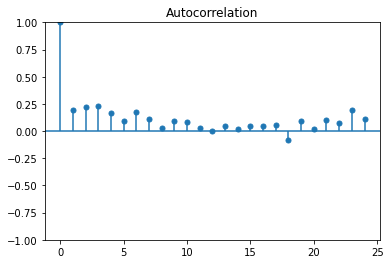

In [21]:
plot_acf(xarelto_wkly['xare_dollars'], alpha=None, lags=24);

C:\Users\sarah\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


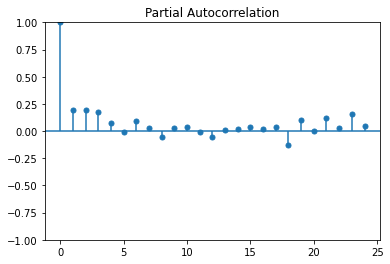

In [22]:
plot_pacf(xarelto_wkly['xare_dollars'], alpha=None, lags=24);

Adding 1 to the weekly sales for each observation so that Holt_winters will work.

In [23]:
xarelto_wkly['xare_dollars'] = [i+1 for i in xarelto_wkly['xare_dollars']]

Set up Train and Test Sets using 2018, 2019 & 2020 Data

In [24]:
train = xarelto_wkly.loc[:'2019-12-31']
train

,xarelto,xare_dollars,z_score
Date_of_Payment,,,
2013-08-04,14,180.84,-3.018471
2013-08-11,9,2182.13,1.331551
2013-08-18,17,262.36,-3.597196
2013-08-25,19,312.55,-3.989598
2013-09-01,15,556.94,-2.658643
...,...,...,...
2019-12-01,11,158.06,-2.346695
2019-12-08,55,918.42,-11.524181
2019-12-15,34,2839.14,-3.526527


In [25]:
train['xare_dollars'].max()

7931.76

In [26]:
train.describe()

,xarelto,xare_dollars,z_score
count,335.000000,335.000000,335.000000
mean,32.038806,1244.978746,-5.589093
std,15.195384,1340.807352,3.163444
min,0.000000,1.000000,-20.081110
25%,21.500000,348.320000,-7.552111
50%,31.000000,695.040000,-5.580686
75%,41.000000,1673.370000,-3.509940
max,117.000000,7931.760000,2.713454


In [27]:
train.index.freq = 'W' 

In [28]:
train.shape

(335, 3)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 335 entries, 2013-08-04 to 2019-12-29
Freq: W-SUN
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   xarelto       335 non-null    int64  
 1   xare_dollars  335 non-null    float64
 2   z_score       335 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 10.5 KB


In [30]:
train.index

DatetimeIndex(['2013-08-04', '2013-08-11', '2013-08-18', '2013-08-25',
               '2013-09-01', '2013-09-08', '2013-09-15', '2013-09-22',
               '2013-09-29', '2013-10-06',
               ...
               '2019-10-27', '2019-11-03', '2019-11-10', '2019-11-17',
               '2019-11-24', '2019-12-01', '2019-12-08', '2019-12-15',
               '2019-12-22', '2019-12-29'],
              dtype='datetime64[ns]', name='Date_of_Payment', length=335, freq='W-SUN')

In [31]:
test = xarelto_wkly.loc['2020-01-01':]
test

,xarelto,xare_dollars,z_score
Date_of_Payment,,,
2020-01-05,5,75.46,-1.061818
2020-01-12,29,350.71,-6.288689
2020-01-19,32,418.34,-6.889418
2020-01-26,23,566.77,-4.530703
2020-02-02,24,302.48,-5.185320
2020-02-09,17,487.49,-3.240567
2020-02-16,22,287.06,-4.737839
2020-02-23,19,339.51,-3.946891
2020-03-01,26,924.66,-4.671630


In [32]:
test.describe()

,xarelto,xare_dollars,z_score
count,53.000000,53.000000,53.000000
mean,11.132075,299.119245,-2.154406
std,8.514778,365.106225,1.743582
min,0.000000,1.000000,-6.889418
25%,4.000000,62.340000,-3.439735
50%,9.000000,163.370000,-1.630421
75%,17.000000,302.480000,-0.859954
max,32.000000,1351.350000,0.239277


In [33]:
test.shape

(53, 3)

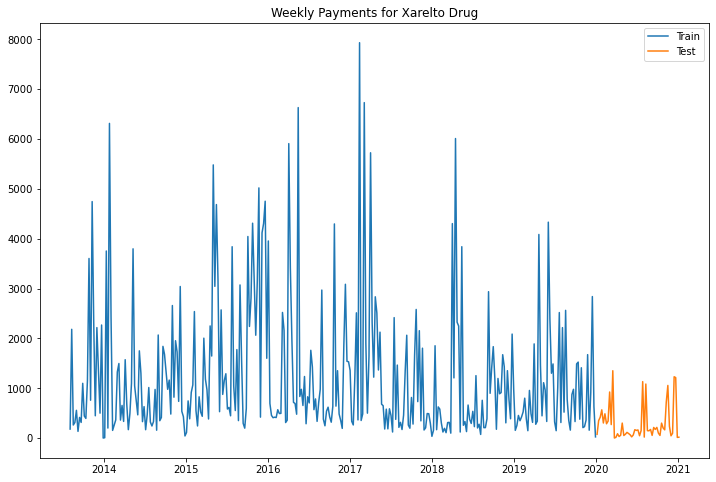

In [34]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['xare_dollars'], label='Train')
plt.plot(test.index, test['xare_dollars'], label='Test')

plt.legend(loc='best')
plt.title("Weekly Payments for Xarelto Drug");

Baseline (Naive Model)

In [35]:
df_preds = test.copy(deep=True)
df_preds

,xarelto,xare_dollars,z_score
Date_of_Payment,,,
2020-01-05,5,75.46,-1.061818
2020-01-12,29,350.71,-6.288689
2020-01-19,32,418.34,-6.889418
2020-01-26,23,566.77,-4.530703
2020-02-02,24,302.48,-5.185320
2020-02-09,17,487.49,-3.240567
2020-02-16,22,287.06,-4.737839
2020-02-23,19,339.51,-3.946891
2020-03-01,26,924.66,-4.671630


In [36]:
df_preds['simple_mean'] = train['xare_dollars'].mean()
df_preds

,xarelto,xare_dollars,z_score,simple_mean
Date_of_Payment,,,,
2020-01-05,5,75.46,-1.061818,1244.978746
2020-01-12,29,350.71,-6.288689,1244.978746
2020-01-19,32,418.34,-6.889418,1244.978746
2020-01-26,23,566.77,-4.530703,1244.978746
2020-02-02,24,302.48,-5.185320,1244.978746
2020-02-09,17,487.49,-3.240567,1244.978746
2020-02-16,22,287.06,-4.737839,1244.978746
2020-02-23,19,339.51,-3.946891,1244.978746
2020-03-01,26,924.66,-4.671630,1244.978746


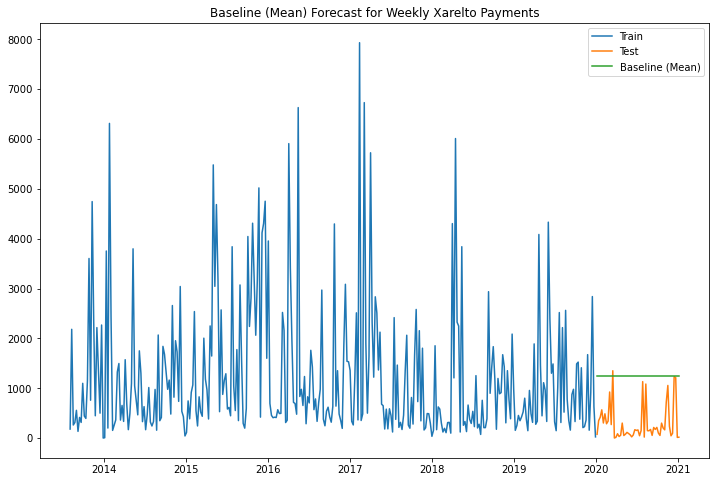

In [37]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['xare_dollars'], label='Train')
plt.plot(test.index, test['xare_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['simple_mean'], label="Baseline (Mean)")

plt.legend(loc='best')
plt.title("Baseline (Mean) Forecast for Weekly Xarelto Payments");

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [39]:
print("MAE for Simple Mean Baseline Model:", mean_absolute_error(df_preds['xare_dollars'], df_preds['simple_mean']))
print("RMSE for Simple Mean Baseline Model:", mean_squared_error(df_preds['xare_dollars'], df_preds['simple_mean'], squared=False))

MAE for Simple Mean Baseline Model: 949.8735105604059
RMSE for Simple Mean Baseline Model: 1012.638932938263


Make a Seasonal Baseline Model with shift of 7

In [40]:
df_preds['seasonal_7'] = train['xare_dollars'].shift(7, freq='W-SUN') 
df_preds.head(2)

,xarelto,xare_dollars,z_score,simple_mean,seasonal_7
Date_of_Payment,,,,,
2020-01-05,5,75.46,-1.061818,1244.978746,359.80
2020-01-12,29,350.71,-6.288689,1244.978746,1673.97


In [41]:
df_preds['seasonal_7'].fillna(0, inplace=True)

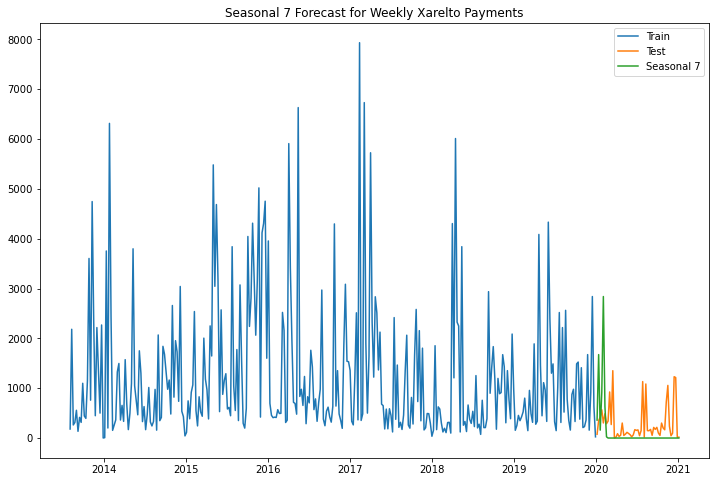

In [42]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['xare_dollars'], label='Train')
plt.plot(test.index, test['xare_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['seasonal_7'], label='Seasonal 7')

plt.legend(loc='best')
plt.title("Seasonal 7 Forecast for Weekly Xarelto Payments");

In [43]:
print("MAE for Seasonal Baseline 7 Shift Model:", mean_absolute_error(df_preds['xare_dollars'], df_preds['seasonal_7']))
print("RMSE for Seasonal Baseline 7 Shift Model:", mean_squared_error(df_preds['xare_dollars'], df_preds['seasonal_7'], squared=False))

MAE for Seasonal Baseline 7 Shift Model: 349.6045283018867
RMSE for Seasonal Baseline 7 Shift Model: 601.654427630008


Seasonal Baseline Model with shift of 52

In [44]:
df_preds['seasonal_52'] = train['xare_dollars'].shift(52, freq='W-SUN') 
df_preds.head(2)

,xarelto,xare_dollars,z_score,simple_mean,seasonal_7,seasonal_52
Date_of_Payment,,,,,,
2020-01-05,5,75.46,-1.061818,1244.978746,359.80,154.97
2020-01-12,29,350.71,-6.288689,1244.978746,1673.97,249.94


In [45]:
df_preds['seasonal_52'].fillna(0, inplace=True)

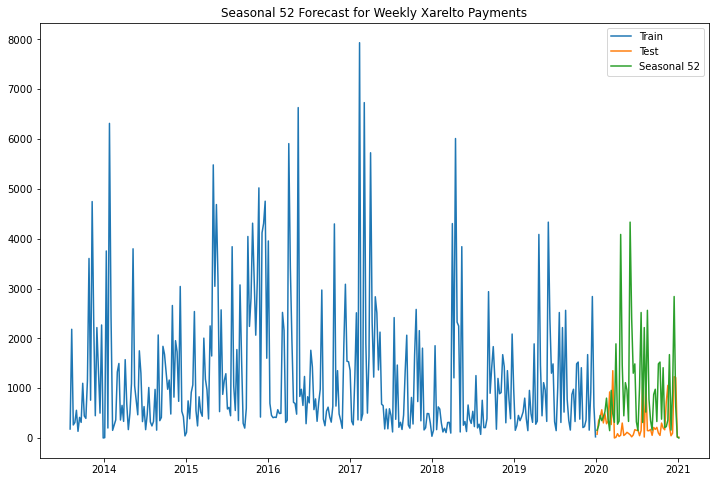

In [46]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['xare_dollars'], label='Train')
plt.plot(test.index, test['xare_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['seasonal_52'], label='Seasonal 52')

plt.legend(loc='best')
plt.title("Seasonal 52 Forecast for Weekly Xarelto Payments");

In [47]:
print("MAE for Seasonal Baseline 52 Shift Model:", mean_absolute_error(df_preds['xare_dollars'], df_preds['seasonal_52']))
print("RMSE for Seasonal Baseline 52 Shift Model:", mean_squared_error(df_preds['xare_dollars'], df_preds['seasonal_52'], squared=False))

MAE for Seasonal Baseline 52 Shift Model: 850.2067924528303
RMSE for Seasonal Baseline 52 Shift Model: 1261.0761753524287


Simple Exponential Smoothing Model

In [48]:
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing

In [49]:
ses = SimpleExpSmoothing(train['xare_dollars']).fit(smoothing_level=.5)

In [50]:
ses.summary()

Dep. Variable:,xare_dollars,No. Observations:,335
Model:,SimpleExpSmoothing,SSE,681021345.679
Optimized:,True,AIC,4869.866
Trend:,None,BIC,4877.494
Seasonal:,None,AICC,4869.987
Seasonal Periods:,None,Date:,"Mon, 14 Mar 2022"
Box-Cox:,False,Time:,12:37:27
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5000000,alpha,False
initial_level,714.96897,l.0,True


In [51]:
ses_forecast = ses.forecast(len(test))

In [52]:
df_preds['ses'] = ses_forecast

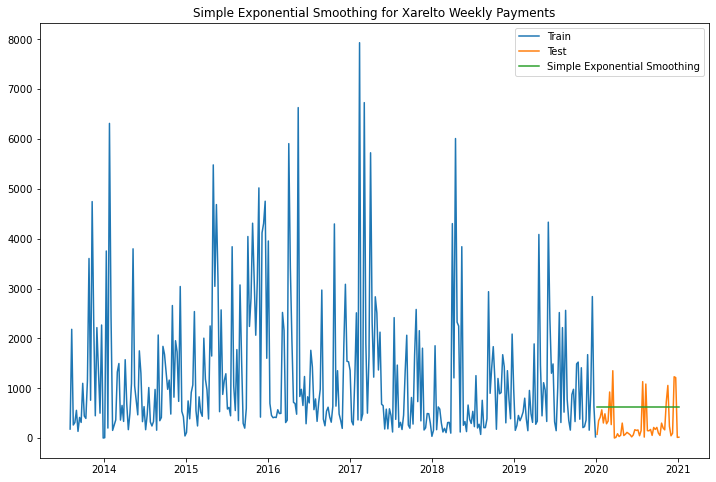

In [53]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['xare_dollars'], label='Train')
plt.plot(test.index, test['xare_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['ses'], label='Simple Exponential Smoothing')

plt.legend(loc='best')
plt.title("Simple Exponential Smoothing for Xarelto Weekly Payments");

In [54]:
print("MAE for Simple Exponential Smoothing Model:", mean_absolute_error(df_preds['xare_dollars'], df_preds['ses']))
print("RMSE for Simple Exponential Smoothing Model:", mean_squared_error(df_preds['xare_dollars'], df_preds['ses'], squared=False))

MAE for Simple Exponential Smoothing Model: 462.5126371694591
RMSE for Simple Exponential Smoothing Model: 483.32451021165497


Holt-Winters Multiplicative Model with Seasonality of 52

In [55]:
hw_m52 = ExponentialSmoothing(
    train['xare_dollars'],
    seasonal_periods=52, 
    trend='mul',
    seasonal='mul'
).fit()

C:\Users\sarah\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [56]:
hw_m52.summary()

Dep. Variable:,xare_dollars,No. Observations:,335
Model:,ExponentialSmoothing,SSE,544567886.372
Optimized:,True,AIC,4902.960
Trend:,Multiplicative,BIC,5116.551
Seasonal:,Multiplicative,AICC,4927.757
Seasonal Periods:,52,Date:,"Mon, 14 Mar 2022"
Box-Cox:,False,Time:,12:37:28
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0403571,alpha,True
smoothing_trend,0.0080714,beta,True


In [57]:
df_preds['hw_m52'] = hw_m52.forecast(len(test))
df_preds.head(2)

,xarelto,xare_dollars,z_score,simple_mean,seasonal_7,seasonal_52,ses,hw_m52
Date_of_Payment,,,,,,,,
2020-01-05,5,75.46,-1.061818,1244.978746,359.80,154.97,619.767291,523.958119
2020-01-12,29,350.71,-6.288689,1244.978746,1673.97,249.94,619.767291,1044.328510


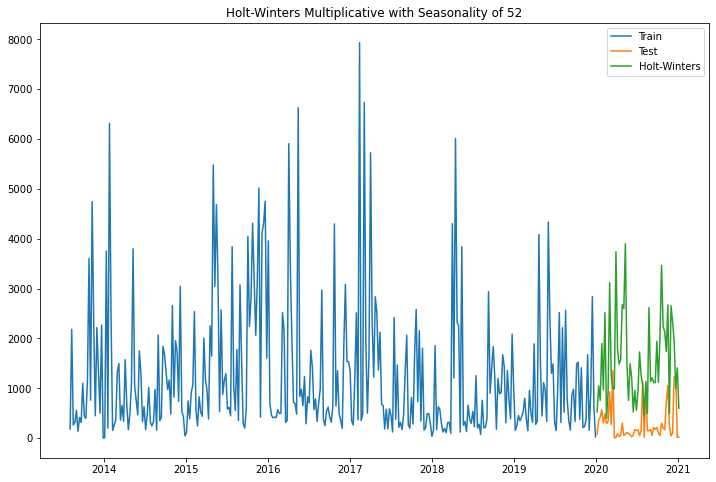

In [58]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['xare_dollars'], label='Train')
plt.plot(test.index, test['xare_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['hw_m52'], label='Holt-Winters')

plt.legend(loc='best')
plt.title("Holt-Winters Multiplicative with Seasonality of 52");

In [59]:
print("MAE for Holt-Winters Multiplicative with Seasonality of 52 Model:", mean_absolute_error(df_preds['xare_dollars'], df_preds['hw_m52']))
print("RMSE for Holt-Winters Multiplicative with Seasonality of 52 Model:", mean_squared_error(df_preds['xare_dollars'], df_preds['hw_m52'], squared=False))

MAE for Holt-Winters Multiplicative with Seasonality of 52 Model: 1275.5257078859852
RMSE for Holt-Winters Multiplicative with Seasonality of 52 Model: 1556.6430157802888


Now, try an additive Holt-Winters Model with a seasonal period of 52.

In [60]:
hw_a52 = ExponentialSmoothing(
    train['xare_dollars'],
    seasonal_periods=52, 
    trend='add',
    seasonal='add'
).fit()

C:\Users\sarah\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [61]:
hw_a52.summary()

Dep. Variable:,xare_dollars,No. Observations:,335
Model:,ExponentialSmoothing,SSE,500225257.679
Optimized:,True,AIC,4874.507
Trend:,Additive,BIC,5088.098
Seasonal:,Additive,AICC,4899.304
Seasonal Periods:,52,Date:,"Mon, 14 Mar 2022"
Box-Cox:,False,Time:,12:37:29
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1110714,alpha,True
smoothing_trend,0.0001,beta,True


In [62]:
df_preds['hw_a52'] = hw_a52.forecast(len(test))
df_preds.head(2)

,xarelto,xare_dollars,z_score,simple_mean,seasonal_7,seasonal_52,ses,hw_m52,hw_a52
Date_of_Payment,,,,,,,,,
2020-01-05,5,75.46,-1.061818,1244.978746,359.80,154.97,619.767291,523.958119,-24.399642
2020-01-12,29,350.71,-6.288689,1244.978746,1673.97,249.94,619.767291,1044.328510,238.390692


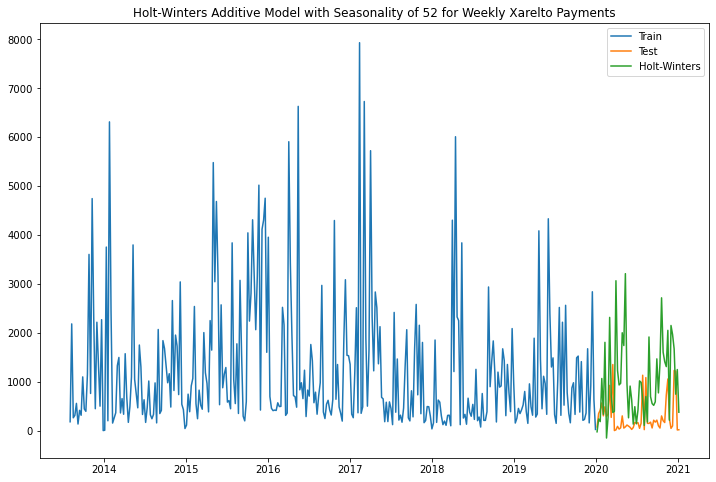

In [63]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['xare_dollars'], label='Train')
plt.plot(test.index, test['xare_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['hw_a52'], label='Holt-Winters')

plt.legend(loc='best')
plt.title("Holt-Winters Additive Model with Seasonality of 52 for Weekly Xarelto Payments");

In [64]:
print("MAE for Holt-Winters Additive with Seasonality of 52 Model:", mean_absolute_error(df_preds['xare_dollars'], df_preds['hw_a52']))
print("RMSE for Holt-Winters Additive with Seasonality of 52 Model:", mean_squared_error(df_preds['xare_dollars'], df_preds['hw_a52'], squared=False))

MAE for Holt-Winters Additive with Seasonality of 52 Model: 837.0293247710275
RMSE for Holt-Winters Additive with Seasonality of 52 Model: 1113.4062790233659


Now, try an additive Holt-Winters Model with a seasonal period of 7.

In [65]:
hw_a7 = ExponentialSmoothing(
    train['xare_dollars'],
    seasonal_periods=7, 
    trend='add',
    seasonal='add'
).fit()

C:\Users\sarah\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [66]:
hw_a7.summary()

Dep. Variable:,xare_dollars,No. Observations:,335
Model:,ExponentialSmoothing,SSE,645689932.072
Optimized:,True,AIC,4870.019
Trend:,Additive,BIC,4911.975
Seasonal:,Additive,AICC,4871.153
Seasonal Periods:,7,Date:,"Mon, 14 Mar 2022"
Box-Cox:,False,Time:,12:37:29
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1817857,alpha,True
smoothing_trend,0.0302976,beta,True


In [67]:
df_preds['hw_a7'] = hw_a7.forecast(len(test))
df_preds.head(2)

,xarelto,xare_dollars,z_score,simple_mean,seasonal_7,seasonal_52,ses,hw_m52,hw_a52,hw_a7
Date_of_Payment,,,,,,,,,,
2020-01-05,5,75.46,-1.061818,1244.978746,359.80,154.97,619.767291,523.958119,-24.399642,529.295696
2020-01-12,29,350.71,-6.288689,1244.978746,1673.97,249.94,619.767291,1044.328510,238.390692,1085.896084


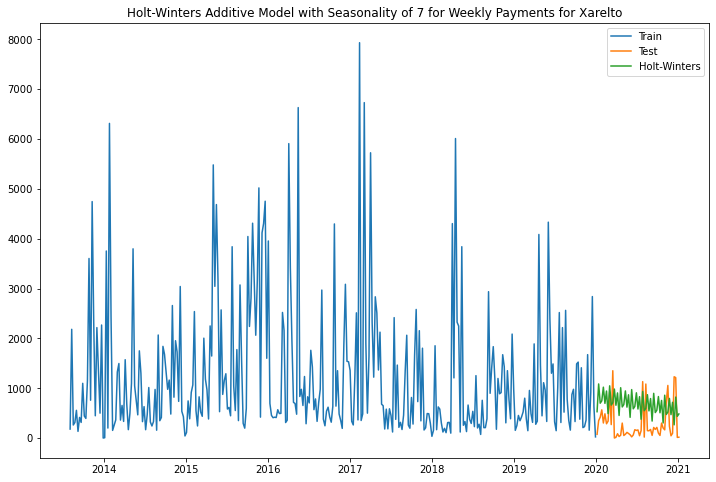

In [68]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['xare_dollars'], label='Train')
plt.plot(test.index, test['xare_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['hw_a7'], label='Holt-Winters')

plt.legend(loc='best')
plt.title("Holt-Winters Additive Model with Seasonality of 7 for Weekly Payments for Xarelto");

In [69]:
print("MAE for Holt-Winters Additive with Seasonality of 7 Model:", mean_absolute_error(df_preds['xare_dollars'], df_preds['hw_a7']))
print("RMSE for Holt-Winters Additive with Seasonality of 7 Model:", mean_squared_error(df_preds['xare_dollars'], df_preds['hw_a7'], squared=False))

MAE for Holt-Winters Additive with Seasonality of 7 Model: 521.0923712386227
RMSE for Holt-Winters Additive with Seasonality of 7 Model: 569.302165122376


Now, try a multiplicative Holt-Winters Model with a seasonal period of 7.

In [70]:
hw_m7 = ExponentialSmoothing(
    train['xare_dollars'],
    seasonal_periods=7, 
    trend='mul',
    seasonal='mul'
).fit()

C:\Users\sarah\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\sarah\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [71]:
hw_m7.summary()

Dep. Variable:,xare_dollars,No. Observations:,335
Model:,ExponentialSmoothing,SSE,3196201003.319
Optimized:,True,AIC,5405.818
Trend:,Multiplicative,BIC,5447.773
Seasonal:,Multiplicative,AICC,5406.952
Seasonal Periods:,7,Date:,"Mon, 14 Mar 2022"
Box-Cox:,False,Time:,12:37:30
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7828571,alpha,True
smoothing_trend,0.0626286,beta,True


In [72]:
df_preds['hw_m7'] = hw_m7.forecast(len(test))
df_preds.head(2)

,xarelto,xare_dollars,z_score,simple_mean,seasonal_7,seasonal_52,ses,hw_m52,hw_a52,hw_a7,hw_m7
Date_of_Payment,,,,,,,,,,,
2020-01-05,5,75.46,-1.061818,1244.978746,359.80,154.97,619.767291,523.958119,-24.399642,529.295696,446.594181
2020-01-12,29,350.71,-6.288689,1244.978746,1673.97,249.94,619.767291,1044.328510,238.390692,1085.896084,663.868996


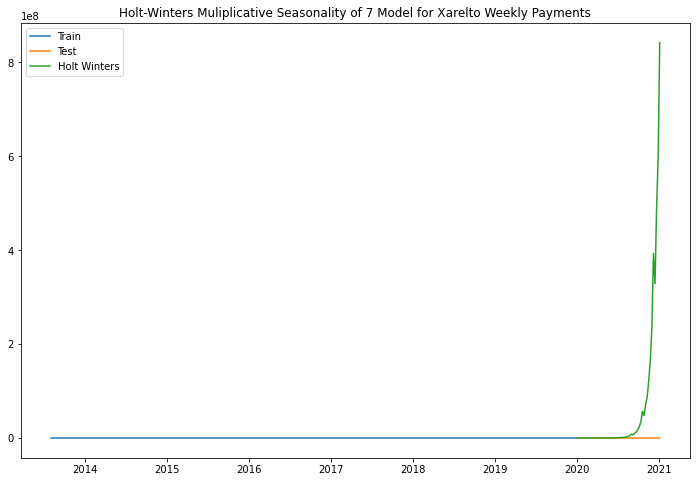

In [73]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['xare_dollars'], label='Train')
plt.plot(test.index, test['xare_dollars'], label='Test')
plt.plot(df_preds.index, df_preds['hw_m7'], label='Holt Winters')

plt.legend(loc='best')
plt.title("Holt-Winters Muliplicative Seasonality of 7 Model for Xarelto Weekly Payments");

In [74]:
print("MAE for Holt-Winters Multiplicative with Seasonality of 7 Model:", mean_absolute_error(df_preds['xare_dollars'], df_preds['hw_m7']))
print("RMSE for Holt-Winters Multiplicative with Seasonality of 7 Model:", mean_squared_error(df_preds['xare_dollars'], df_preds['hw_m7'], squared=False))

MAE for Holt-Winters Multiplicative with Seasonality of 7 Model: 67363616.63871782
RMSE for Holt-Winters Multiplicative with Seasonality of 7 Model: 178446669.09303463


Try a SARIMA Model

In [75]:
from pmdarima.utils import tsdisplay

In [76]:
traina = train['xare_dollars']

C:\Users\sarah\anaconda3\lib\site-packages\pmdarima\utils\visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


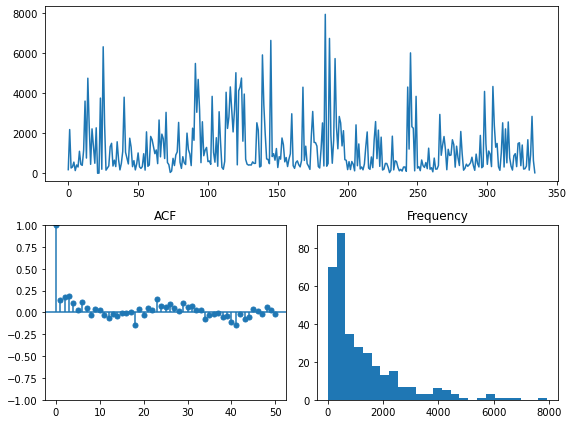

In [77]:
tsdisplay(traina)

In [78]:
import pmdarima as pmd
model_s7 = pmd.auto_arima(train['xare_dollars'], m=7, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=5767.806, Time=0.85 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=5778.376, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=5775.084, Time=0.06 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=5776.393, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=5985.123, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[7] intercept   : AIC=5769.615, Time=0.22 sec
 ARIMA(2,0,2)(1,0,0)[7] intercept   : AIC=5769.925, Time=0.22 sec
 ARIMA(2,0,2)(2,0,1)[7] intercept   : AIC=inf, Time=1.13 sec
 ARIMA(2,0,2)(1,0,2)[7] intercept   : AIC=inf, Time=2.93 sec
 ARIMA(2,0,2)(0,0,0)[7] intercept   : AIC=5768.078, Time=0.12 sec
 ARIMA(2,0,2)(0,0,2)[7] intercept   : AIC=5771.293, Time=1.05 sec
 ARIMA(2,0,2)(2,0,0)[7] intercept   : AIC=5771.311, Time=0.45 sec
 ARIMA(2,0,2)(2,0,2)[7] intercept   : AIC=inf, Time=3.36 sec
 ARIMA(1,0,2)(1,0,1)[7] intercept   : AIC=5766.048, Time=0.47 sec
 ARIMA(1,0,2)(0,0,1)[7] intercept   : AIC=5767.9

In [79]:
model_s7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  335
Model:             SARIMAX(1, 0, 2)x(1, 0, [1], 7)   Log Likelihood               -2876.024
Date:                             Mon, 14 Mar 2022   AIC                           5766.048
Time:                                     12:37:55   BIC                           5792.747
Sample:                                          0   HQIC                          5776.692
                                             - 335                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    751.4122    330.492      2.274      0.023     103.660    1399.164
ar.L1          0.6666      0.143      4.650      0.000       0.386       0.948
ma.L1         -0.5863      0.148     -3.953      0.000      -0.877      -0.296
ma.L2          0.1174      0.060      1.951      0.051      -0.001       0.235
ar.S.L7       -0.7912      0.565     -1.401      0.161      -1.898       0.315
ma.S.L7        0.8126      0.542      1.500      0.134      -0.249       1.875
sigma2      1.712e+06   1.24e+05     13.799      0.000    1.47e+06    1.96e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               510.63
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                             1.96
Prob(H) (two-sided):                  0.13   Kurtosis:                         7.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [80]:
preds_sar7 = model_s7.predict(test.shape[0])
preds_sar7

array([1161.66279698, 1080.91434604, 1079.2331938 , 1160.88138814,
       1233.07220401, 1213.79547777, 1204.51363244, 1250.63284171,
       1210.54156206, 1274.57880753, 1251.7816732 , 1222.53077795,
       1256.3568174 , 1276.08242237, 1247.84796122, 1285.06931506,
       1238.07234903, 1258.55381769, 1283.32621641, 1257.65031743,
       1242.76812532, 1265.58931277, 1236.46250551, 1273.85988219,
       1257.79844871, 1238.29445946, 1258.67214885, 1270.48893538,
       1252.46160689, 1275.52484809, 1245.94950522, 1258.66528315,
       1274.10193846, 1257.98332541, 1248.63665033, 1262.90108365,
       1244.65511183, 1268.05513422, 1257.99521071, 1245.78243241,
       1258.53530251, 1265.93030834, 1254.6447339 , 1269.08056529,
       1250.56708238, 1258.52627662, 1268.18874741, 1258.09900097,
       1252.24826157, 1261.1771379 , 1249.75586467, 1264.40328241,
       1258.10616411])

In [81]:
df_preds['sarima7_auto'] = preds_sar7
df_preds['sarima7_auto'].head(2)

Date_of_Payment
2020-01-05    1161.662797
2020-01-12    1080.914346
Freq: W-SUN, Name: sarima7_auto, dtype: float64

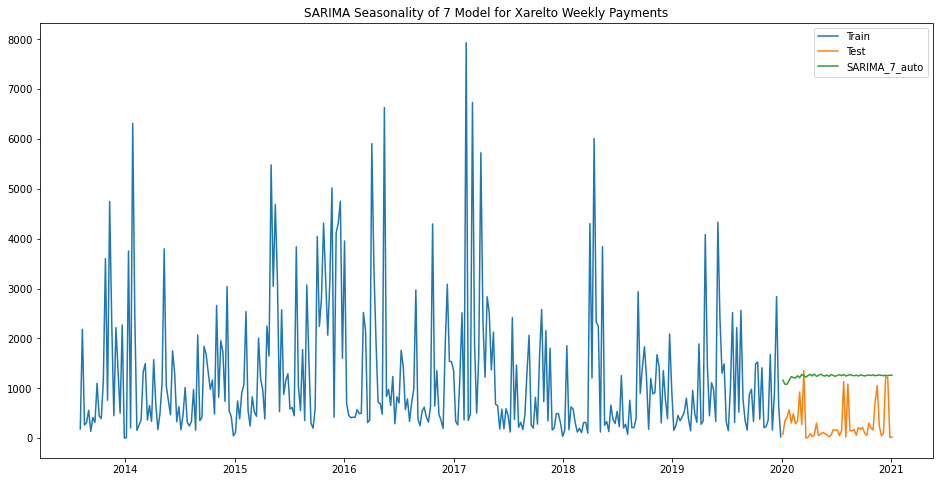

In [82]:
plt.figure(figsize=(16,8))
plt.plot(train['xare_dollars'], label='Train')
plt.plot(test['xare_dollars'], label='Test')
plt.plot(df_preds['sarima7_auto'], label='SARIMA_7_auto')
plt.legend(loc='best')
plt.title("SARIMA Seasonality of 7 Model for Xarelto Weekly Payments");

In [83]:
print("MAE for SARIMA with Seasonality of 7 Model:", mean_absolute_error(df_preds['xare_dollars'], df_preds['sarima7_auto']))
print("RMSE for SARIMA with Seasonality of 7 Model:", mean_squared_error(df_preds['xare_dollars'], df_preds['sarima7_auto'], squared=False))

MAE for SARIMA with Seasonality of 7 Model: 949.0344009134814
RMSE for SARIMA with Seasonality of 7 Model: 1014.2019477974396


Try a SARIMA Model with m = 52

In [84]:
model_s52 = pmd.auto_arima(train['xare_dollars'], m=52, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=5764.402, Time=5.37 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=5778.376, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=5770.539, Time=0.91 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=5770.043, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=5985.123, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[52] intercept   : AIC=5763.347, Time=2.46 sec
 ARIMA(2,0,2)(0,0,0)[52] intercept   : AIC=5768.078, Time=0.13 sec
 ARIMA(2,0,2)(0,0,2)[52] intercept   : AIC=5765.021, Time=11.71 sec
 ARIMA(2,0,2)(1,0,0)[52] intercept   : AIC=5764.525, Time=3.10 sec
 ARIMA(2,0,2)(1,0,2)[52] intercept   : AIC=inf, Time=34.45 sec
 ARIMA(1,0,2)(0,0,1)[52] intercept   : AIC=5761.585, Time=1.44 sec
 ARIMA(1,0,2)(0,0,0)[52] intercept   : AIC=5766.418, Time=0.06 sec
 ARIMA(1,0,2)(1,0,1)[52] intercept   : AIC=5762.532, Time=3.16 sec
 ARIMA(1,0,2)(0,0,2)[52] intercept   : AIC=5763.293, Time=6.30 sec
 ARIMA(1,0,2)(1,0,0)[5

In [85]:
model_s52.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  335
Model:             SARIMAX(1, 0, 3)x(0, 0, [1], 52)   Log Likelihood               -2872.958
Date:                              Mon, 14 Mar 2022   AIC                           5759.916
Time:                                      12:40:45   BIC                           5786.615
Sample:                                           0   HQIC                          5770.560
                                              - 335                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    766.1382    397.204      1.929      0.054     -12.368    1544.644
ar.L1          0.3894      0.290      1.344      0.179      -0.178       0.957
ma.L1         -0.3014      0.299     -1.007      0.314      -0.888       0.285
ma.L2          0.0977      0.053      1.830      0.067      -0.007       0.202
ma.L3          0.1051      0.062      1.704      0.088      -0.016       0.226
ma.S.L52       0.1454      0.054      2.717      0.007       0.041       0.250
sigma2      1.716e+06   1.22e+05     14.118      0.000    1.48e+06    1.95e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               494.56
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                             1.93
Prob(H) (two-sided):                  0.19   Kurtosis:                         7.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [86]:
preds_sar52 = model_s52.predict(test.shape[0])
preds_sar52

array([1146.36753132,  894.6970914 ,  946.34927296, 1056.67009183,
       1113.40645285, 1177.00431705, 1205.22767624, 1146.90453099,
       1133.51570459, 1232.51491148, 1161.03024543, 1144.06714379,
       1294.25583242, 1115.799351  , 1020.7943468 , 1648.83156818,
       1268.86860565, 1161.87581392, 1179.67040574, 1232.06290992,
       1138.45956519, 1723.08588247, 1430.63363185, 1277.13557916,
       1307.08585167, 1132.55267984, 1111.76087546, 1223.65332356,
       1458.54718247, 1139.21344404, 1416.73897535, 1155.78380781,
       1463.77109625, 1204.27598705, 1142.71902808, 1062.80853854,
       1203.94295936, 1208.31779587, 1107.33339789, 1287.43309763,
       1318.3884395 , 1131.49547208, 1283.97967482, 1112.80527079,
       1094.41068311, 1123.20061966, 1332.8714973 , 1089.85110467,
       1213.04660613, 1501.28106028, 1143.58387475, 1078.08812729,
       1259.25545262])

In [87]:
df_preds['sarima52_auto'] = preds_sar52
df_preds['sarima52_auto'].head(2)

Date_of_Payment
2020-01-05    1146.367531
2020-01-12     894.697091
Freq: W-SUN, Name: sarima52_auto, dtype: float64

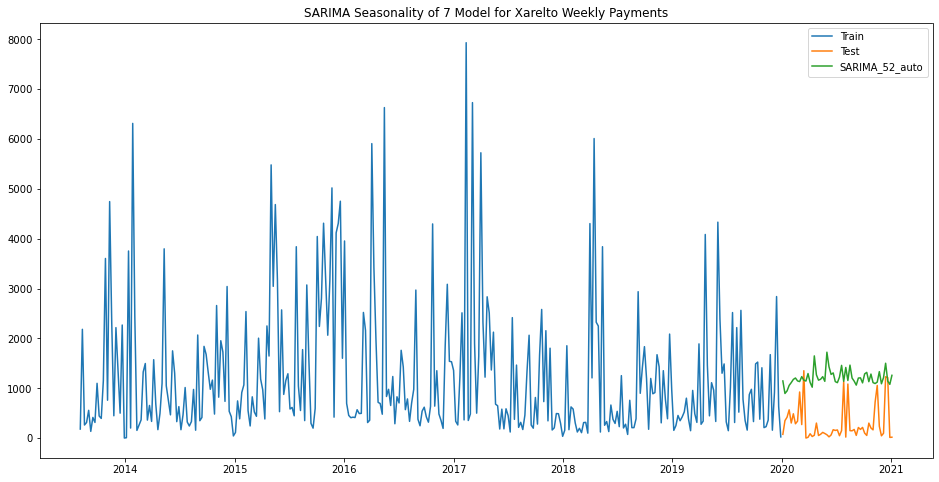

In [88]:
plt.figure(figsize=(16,8))
plt.plot(train['xare_dollars'], label='Train')
plt.plot(test['xare_dollars'], label='Test')
plt.plot(df_preds['sarima52_auto'], label='SARIMA_52_auto')
plt.legend(loc='best')
plt.title("SARIMA Seasonality of 7 Model for Xarelto Weekly Payments");

In [89]:
print("MAE for Holt-Winters Additive with Seasonality of 52 Model:", mean_absolute_error(df_preds['xare_dollars'], df_preds['sarima52_auto']))
print("RMSE for Holt-Winters Additive with Seasonality of 52 Model:", mean_squared_error(df_preds['xare_dollars'], df_preds['sarima52_auto'], squared=False))

MAE for Holt-Winters Additive with Seasonality of 52 Model: 921.2037008634665
RMSE for Holt-Winters Additive with Seasonality of 52 Model: 1000.9508776039659


In [90]:
print("Summary of Metrics for Weekly Xarelto CMS Payments")
print("_________________________________________________")
print("MAE for Simple Mean Baseline Model:", mean_absolute_error(df_preds['xare_dollars'], df_preds['simple_mean']))
print("RMSE for Simple Mean Baseline Model:", mean_squared_error(df_preds['xare_dollars'], df_preds['simple_mean'], squared=False))
print("_________________________________________________")
print("MAE for Seasonal Baseline 7 Shift Model:", mean_absolute_error(df_preds['xare_dollars'], df_preds['seasonal_7']))
print("RMSE for Seasonal Baseline 7 Shift Model:", mean_squared_error(df_preds['xare_dollars'], df_preds['seasonal_7'], squared=False))
print("_________________________________________________")
print("MAE for Seasonal Baseline 52 Shift Model:", mean_absolute_error(df_preds['xare_dollars'], df_preds['seasonal_52']))
print("RMSE for Seasonal Baseline 52 Shift Model:", mean_squared_error(df_preds['xare_dollars'], df_preds['seasonal_52'], squared=False))
print("_________________________________________________")
print("MAE for Simple Exponential Smoothing Model:", mean_absolute_error(df_preds['xare_dollars'], df_preds['ses']))
print("RMSE for Simple Exponential Smoothing Model:", mean_squared_error(df_preds['xare_dollars'], df_preds['ses'], squared=False))
print("_________________________________________________")
print("MAE for Holt-Winters Multiplicative with Seasonality of 7 Model:", mean_absolute_error(df_preds['xare_dollars'], df_preds['hw_m7']))
print("RMSE for Holt-Winters Multiplicative with Seasonality of 7 Model:", mean_squared_error(df_preds['xare_dollars'], df_preds['hw_m7'], squared=False))
print("_________________________________________________")
print("MAE for Holt-Winters Multiplicative with Seasonality of 52 Model:", mean_absolute_error(df_preds['xare_dollars'], df_preds['hw_m52']))
print("RMSE for Holt-Winters Multiplicative with Seasonality of 52 Model:", mean_squared_error(df_preds['xare_dollars'], df_preds['hw_m52'], squared=False))
print("_________________________________________________")


Summary of Metrics for Weekly Xarelto CMS Payments
_________________________________________________
MAE for Simple Mean Baseline Model: 949.8735105604059
RMSE for Simple Mean Baseline Model: 1012.638932938263
_________________________________________________
MAE for Seasonal Baseline 7 Shift Model: 349.6045283018867
RMSE for Seasonal Baseline 7 Shift Model: 601.654427630008
_________________________________________________
MAE for Seasonal Baseline 52 Shift Model: 850.2067924528303
RMSE for Seasonal Baseline 52 Shift Model: 1261.0761753524287
_________________________________________________
MAE for Simple Exponential Smoothing Model: 462.5126371694591
RMSE for Simple Exponential Smoothing Model: 483.32451021165497
_________________________________________________
MAE for Holt-Winters Multiplicative with Seasonality of 7 Model: 67363616.63871782
RMSE for Holt-Winters Multiplicative with Seasonality of 7 Model: 178446669.09303463
_________________________________________________
MAE fo

In [91]:
print("Continued Summary of Metrics for Weeky Xarelto CMS Payments")
print("_________________________________________________")
print("MAE for Holt-Winters Additive with Seasonality of 7 Model:", mean_absolute_error(df_preds['xare_dollars'], df_preds['hw_a7']))
print("RMSE for Holt-Winters Additive with Seasonality of 7 Model:", mean_squared_error(df_preds['xare_dollars'], df_preds['hw_a7'], squared=False))
print("_________________________________________________")
print("MAE for Holt-Winters Additive with Seasonality of 52 Model:", mean_absolute_error(df_preds['xare_dollars'], df_preds['hw_a52']))
print("RMSE for Holt-Winters Additive with Seasonality of 52 Model:", mean_squared_error(df_preds['xare_dollars'], df_preds['hw_a52'], squared=False))
print("_________________________________________________")
print("MAE for SARIMA with Seasonality of 7 Model:", mean_absolute_error(df_preds['xare_dollars'], df_preds['sarima7_auto']))
print("RMSE for SARIMA with Seasonality of 7 Model:", mean_squared_error(df_preds['xare_dollars'], df_preds['sarima7_auto'], squared=False))
print("_________________________________________________")
print("MAE for SARIMA with Seasonality of 52 Model:", mean_absolute_error(df_preds['xare_dollars'], df_preds['sarima52_auto']))
print("RMSE for SARIMA with Seasonality of 52 Model:", mean_squared_error(df_preds['xare_dollars'], df_preds['sarima52_auto'], squared=False))
print("_________________________________________________")

Continued Summary of Metrics for Weeky Xarelto CMS Payments
_________________________________________________
MAE for Holt-Winters Additive with Seasonality of 7 Model: 521.0923712386227
RMSE for Holt-Winters Additive with Seasonality of 7 Model: 569.302165122376
_________________________________________________
MAE for Holt-Winters Additive with Seasonality of 52 Model: 837.0293247710275
RMSE for Holt-Winters Additive with Seasonality of 52 Model: 1113.4062790233659
_________________________________________________
MAE for SARIMA with Seasonality of 7 Model: 949.0344009134814
RMSE for SARIMA with Seasonality of 7 Model: 1014.2019477974396
_________________________________________________
MAE for SARIMA with Seasonality of 52 Model: 921.2037008634665
RMSE for SARIMA with Seasonality of 52 Model: 1000.9508776039659
_________________________________________________
